## Basic ML Principles

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2


In [5]:
import os
import pandas as pd

# Construct file paths
training_file = os.path.join(path, "twitter_training.csv")
validation_file = os.path.join(path, "twitter_validation.csv")

# Load the datasets
train_data = pd.read_csv(training_file)
validation_data = pd.read_csv(validation_file)

# Inspect the datasets
print("Training Dataset Shape:", train_data.shape)
print("Validation Dataset Shape:", validation_data.shape)

# Display sample data
print(train_data.head())

Training Dataset Shape: (74681, 4)
Validation Dataset Shape: (999, 4)
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
# Rename columns to meaningful names
train_data.columns = ['id', 'entity', 'sentiment', 'tweet']
validation_data.columns = ['id', 'entity', 'sentiment', 'tweet']

# Display updated column names
print("Updated Column Names:")
print(train_data.columns)
print(validation_data.columns)

Updated Column Names:
Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')
Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')


In [ ]:
# Map sentiment labels to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
train_data['sentiment'] = train_data['sentiment'].map(sentiment_mapping)

# Drop the 'id' column if it's not needed
# train_data = train_data.drop(columns=['id'])

# Final preprocessed dataset
print("Preprocessed Data:")
print(train_data.head())


Preprocessed Data:
     id       entity  sentiment  \
0  2401  Borderlands        1.0   
1  2401  Borderlands        1.0   
2  2401  Borderlands        1.0   
3  2401  Borderlands        1.0   
4  2401  Borderlands        1.0   

                                               tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [ ]:
# Import the necessary library and class
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Handle NaN values in 'text' column before applying TF-IDF
# Replace NaN values with an empty string
train_data['tweet'] = train_data['tweet'].fillna('')
validation_data['tweet'] = validation_data['tweet'].fillna('')

X_train = vectorizer.fit_transform(train_data['tweet']).toarray()
X_validation = vectorizer.transform(validation_data['tweet']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
y_train = train_data['sentiment'].fillna(-2)
y_validation = validation_data['sentiment'].fillna(-2)

# Split training data into train and test subsets for validation
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()


<ipython-input-43-8fa1c48d9b1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='sentiment', palette='viridis')


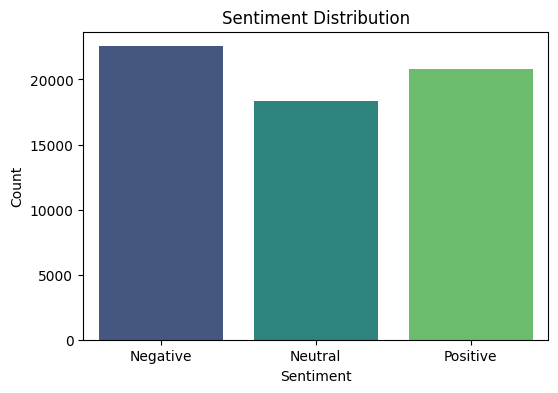

In [ ]:
# Sentiment districution (Positive, Negative, Neutral)

# Sentiment Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='sentiment', palette='viridis')

# Customize x-ticks to show 'Negative', 'Neutral', 'Positive' instead of numerical values
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-44-d75f07043db9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='entity', palette='Set2', order=train_data['entity'].value_counts().index)


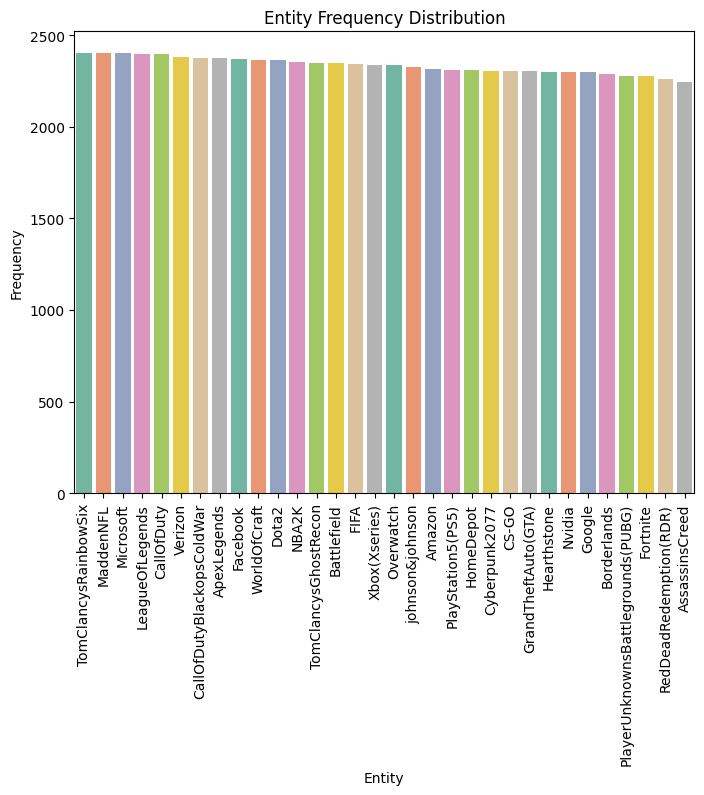

In [ ]:
# Entity Frequency Visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='entity', palette='Set2', order=train_data['entity'].value_counts().index)

plt.title('Entity Frequency Distribution')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()


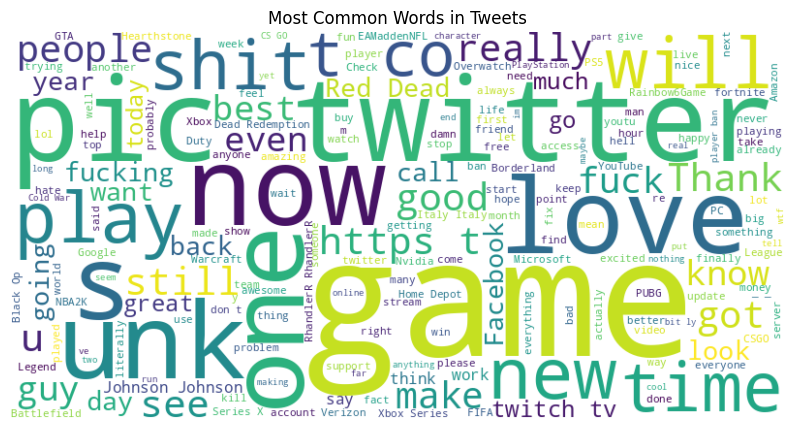

In [ ]:
# Word Cloud Visualization
# Combine all tweet texts into a single string
text = ' '.join(train_data['tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for WordCloud
plt.title('Most Common Words in Tweets')
plt.show()


<ipython-input-50-81bccc41e6ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='sentiment', palette='viridis')


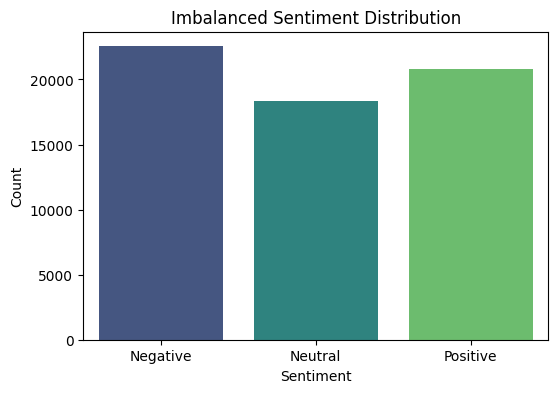

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset is already loaded and preprocessed as 'train_data' in previous experiments

# Visualize the imbalance in the sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='sentiment', palette='viridis')

# Customize x-ticks
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])

plt.title('Imbalanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Handle missing values
train_data = train_data.dropna(subset=['sentiment'])

# Encode categorical variables
categorical_columns = ['entity']
label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Convert tweet data using TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(train_data['tweet']).toarray()

# Concatenate the TF-IDF features with other numerical features
X = pd.concat([train_data.drop(columns=['tweet', 'sentiment']), pd.DataFrame(X_text)], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# The target variable 'sentiment'
y = train_data['sentiment']

<ipython-input-8-1d3fc4cf282f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = label_encoder.fit_transform(train_data[col])



Class distribution before SMOTE:
sentiment
-1.0    22542
 1.0    20831
 0.0    18318
Name: count, dtype: int64


<ipython-input-9-791dca797048>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


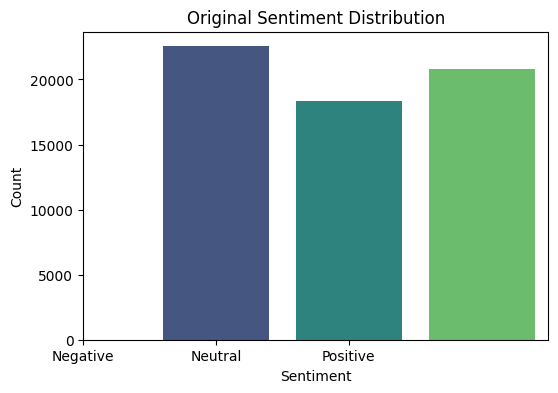

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the original class distribution
print("\nClass distribution before SMOTE:")
print(y.value_counts())

# Visualize the original class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.xticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())